Scarichiamo i dati da Kaggle.

Bisogna registrarsi e creare un'API code.

Cliccare sull'icona con il proprio profilo in alto a destra

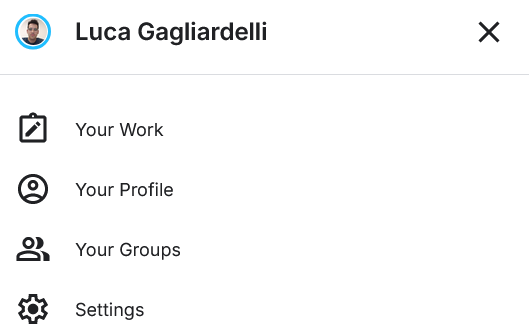


poi cliccare su "Settings".

Nella voce API cliccare su "Create New Token"

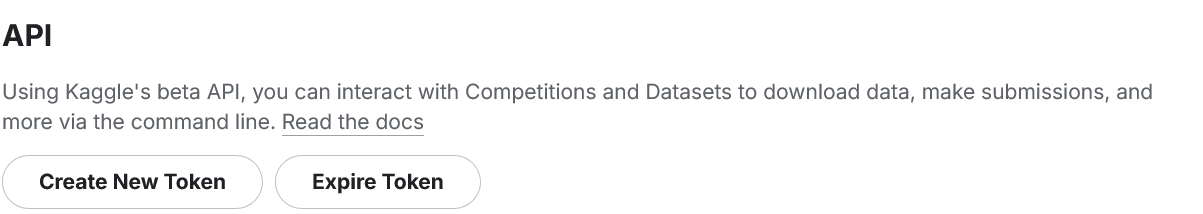


Scaricherà un file json che contiene il vostro username e un'API key.

Usando la seguente libreria è possibile scaricare dataset direttamente da Kaggle, basta inserire nel metodo `od.download` l'URL del dataset.

In [1]:
!pip install opendatasets -q

import opendatasets as od

od.download("https://www.kaggle.com/datasets/vivek468/superstore-dataset-final")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lucagagliardelli
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final


100%|██████████| 550k/550k [00:00<00:00, 567MB/s]

In [29]:
import pandas as pd
df = pd.read_csv('superstore-dataset-final/Sample - Superstore.csv', encoding='latin1')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


## Grafico a linee (line chart)
Consente di visualizzare l’andamento di un valore su una linea. Può essere utile per visualizzare valori continui ad esempio rispetto al tempo.
Il metodo da usare è `dataframe.plot.line(x=colonna, y=colonna)`.

x e y sono le colonne da visualizzare una su un’asse e una sull’altro, se omessi, visualizza tutti i campi numerici sull’asse y e l’indice sull’asse x.


<Axes: title={'center': 'Vendite per data nel 2014'}, xlabel='Data', ylabel='Vendite'>

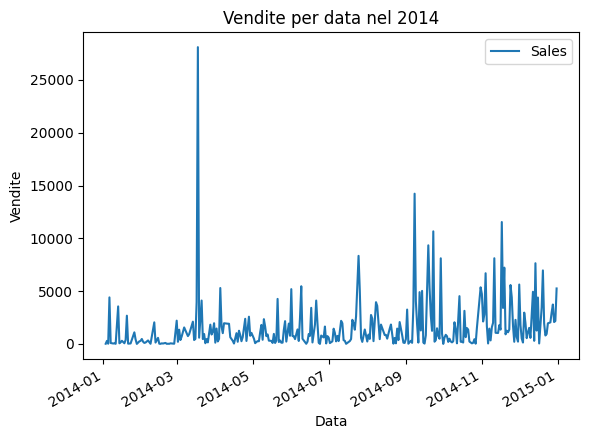

In [35]:
dati = df[['Order Date', 'Sales']].copy()
dati['Order Date'] = pd.to_datetime(dati['Order Date'])
dati = dati[dati['Order Date'].dt.year == 2014]
dati = dati.groupby('Order Date').agg('sum')
dati.plot.line(xlabel='Data', ylabel='Vendite', title="Vendite per data nel 2014")

## Boxplot
Consente di visualizzare la distribuzione dei dati in un boxplot. Si può generare con il metodo `dataframe.plot.box(column=colonne, by=colonne)` dove column sono le colonne di cui si vuole generare la distribuzione e by sono le colonne per cui raggruppare i dati, se omesse viene usata l’intera serie.
Ad esempio, possiamo vedere il boxplot del profitto in generale, come si vede ci sono molti outliers


<Axes: >

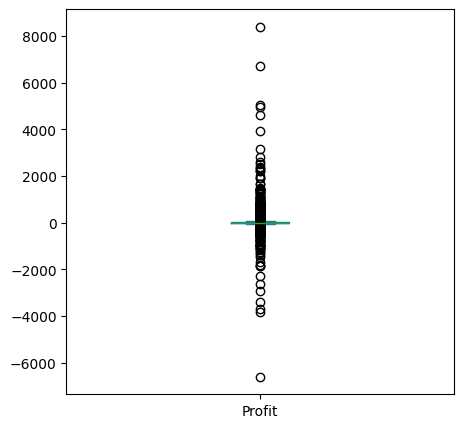

In [12]:
df.plot.box(column=['Profit'], figsize=(5, 5))

,0
Profit,"Axes(0.125,0.11;0.775x0.77)"


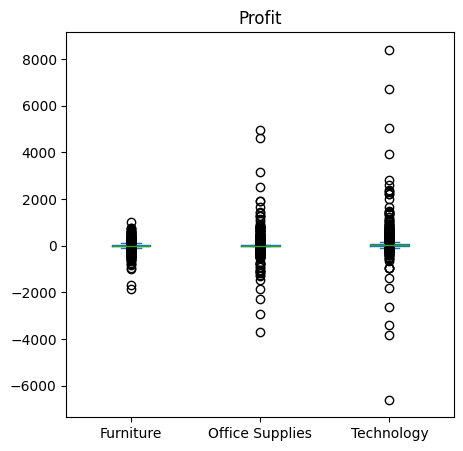

In [13]:
df.plot.box(column=['Profit'], by=['Category'], figsize=(5, 5))

## Densità
Fornisce una stima della densità dei valori mostrandoli come una distribuzione che rappresenta la probabilità di trovare un valore in quel range.

A differenza di un istogramma mostra una distribuzione lineare dei valori. Maggiori informazioni su questo metodo possono essere trovate qui https://it.wikipedia.org/wiki/Stima_kernel_di_densit%C3%A0.

Per generarla si possono usare equivalentemente i metodi: `serie.plot.kde()` oppure `serie.plot.density()`.

Ad esempio, supponiamo di eliminare gli outliers dai profitti e visualizzarne poi gli istogrammi e la densità


In [17]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
no_outliers = df[(df['Profit'] >= Q1 - 1.5*IQR) & (df['Profit'] <= Q3 + 1.5*IQR)]

Come si può veder la curva di densità sulla sinistra ricalca il profilo dell’istogramma, mostrando dove sono concentrati i valori.
È utile per avere un’idea generale di come sono distribuiti i dati (esempio, se la distribuzione è unimodale o multimodale).

<Axes: >

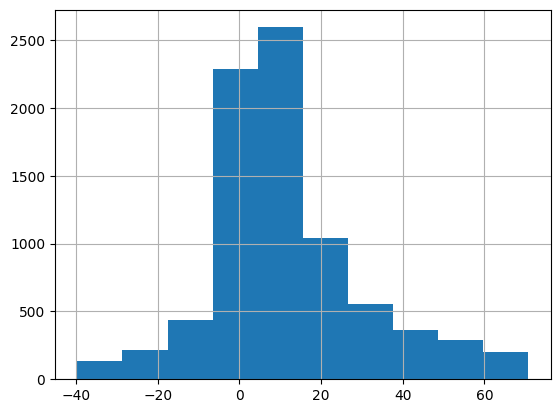

In [15]:
no_outliers['Profit'].hist(bins=10)

<Axes: ylabel='Density'>

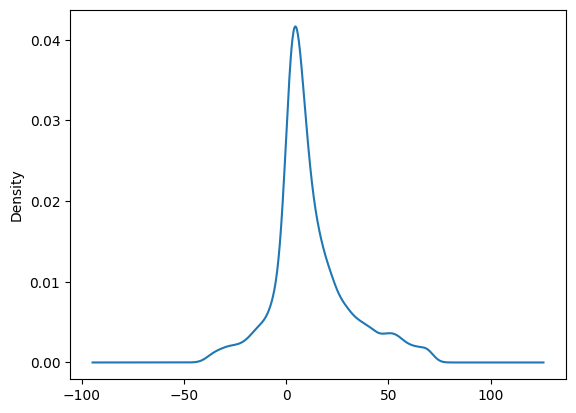

In [16]:
no_outliers['Profit'].plot.density()

## Grafico a torta (pie chart)
Si può utilizzare il metodo `dataframe.plot.pie(y=colonna)` dove y è la colonna di cui visualizzare il piechart. Le classi vengono prese dall’indice del dataframe.
Ad esempio, possiamo mostrare la percentuale di vendite sulla base delle diverse categorie presenti


<Axes: >

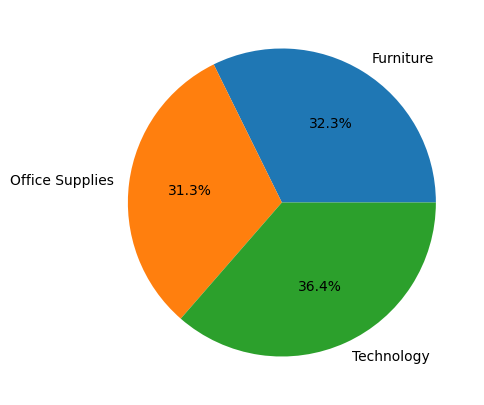

In [18]:
df.groupby('Category')['Sales'].sum().plot.pie(figsize=(5, 5), autopct='%1.1f%%', ylabel='', y='Sales')

## Scatter plot

Può essere generato con il metodo `dataframe.plot.scatter(x=colonna, y=colonna)` e mostra la distribuzione dei valori di una colonna rispetto all’altra. Tipicamente, si confrontano colonne con valori continui.
Ad esempio, possiamo confrontare le vendite con i profitti


<Axes: title={'center': 'Sales vs Profit'}, xlabel='Sales', ylabel='Profit'>

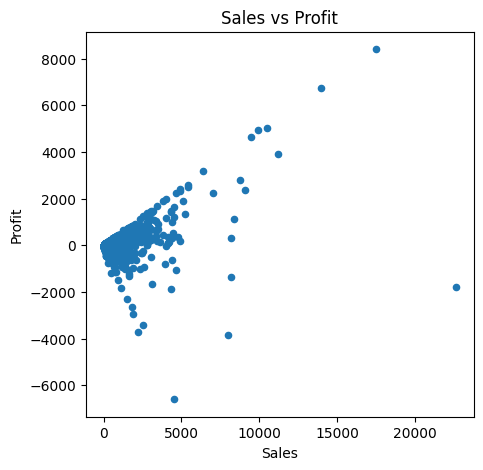

In [19]:
df.plot.scatter(x='Sales', y='Profit', figsize=(5, 5), title='Sales vs Profit')

## Correlazione

La matrice di correlazione di un dataframe può essere calcolata con il metodo `dataframe.corr([numeric_only=False])`, questa può essere applicata solo a colonne di tipo numerico, quindi per non ricevere errori bisogna o selezionare prima le colonne numeriche o impostare numeric_only=True.

In [20]:
df.corr(numeric_only=True)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


È anche possibile colorare le celle per simulare una heatmap con il metodo `.style.background_gradient(cmap='RdYlGn')`, il parametro cmap definisce la mappa di colori da usare, in questo caso è rosso giallo verde, ce ne sono varie che possono essere trovate nel manuale di Matplotlib (https://matplotlib.org/stable/users/explain/colors/colormaps.html).

In [21]:
df.corr(numeric_only=True).style.background_gradient(cmap='RdYlGn')


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000
